In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scienceplots

from nanonets import Simulation
from nanonets.utils import load_simulation_results

plt.style.use(["science","bright","grid"])

# PARAMETERS
V_INPUT_MAX = 0.1
N_INPUTS    = 320
N_PARTICLES = [3,4,5,6,7,8,9,10,11,12,13,14,15]
N_E         = 2
V_INPUT     = np.round(np.linspace(-V_INPUT_MAX, V_INPUT_MAX, N_INPUTS),4)
V_I_PLOT    = 1000*V_INPUT
PATH        = "/home/jonasmensing/bagheera/data/1_funding_period/iv_curves/networks/"
ELE_CHARGE  = 0.160217662

# TIME
AC_TIME     = 40e-9
BATCH_TIME  = 20*AC_TIME

### IV Curve

In [83]:
data = load_simulation_results(PATH,N_PARTICLES,N_E)
net  = {N : pd.read_csv(f"{PATH}net_currents_Nx={N}_Ny={N}_Ne={N_E}.csv") for N in N_PARTICLES}

y   = {N : data[N]['Observable'].values for N in N_PARTICLES}
y_e = {N : data[N]['Error'].values for N in N_PARTICLES}
k_t = {N : net[N].sum(axis=1).values/ELE_CHARGE for N in N_PARTICLES}
l_t = {N : (1 / k_t[N]) > BATCH_TIME for N in N_PARTICLES}

# Set Currents via mask to Zero
for N in N_PARTICLES:
    y[N][l_t[N]] = 0.0
    y_e[N][l_t[N]] = 0.0

IndexError: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 40

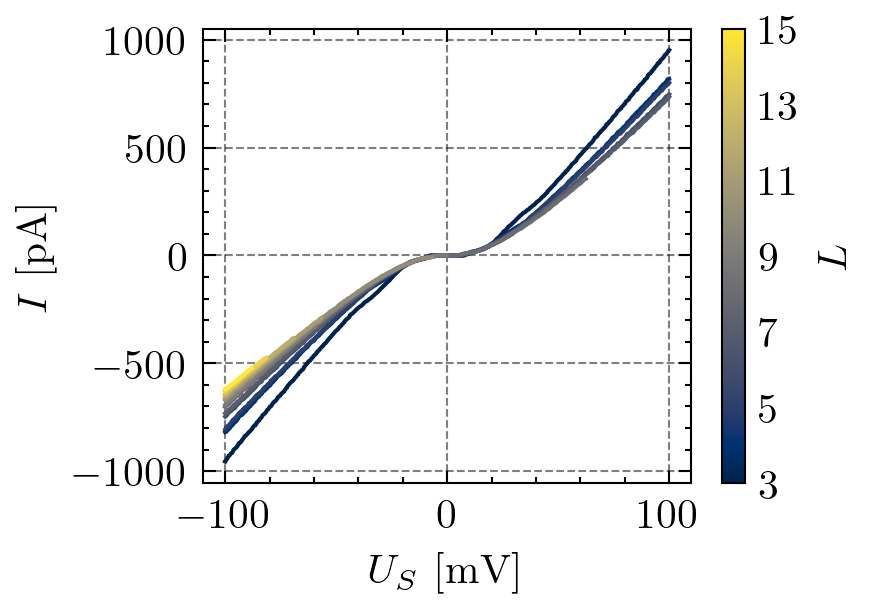

In [88]:
cmap    = plt.get_cmap('cividis')
norm    = mcolors.Normalize(vmin=min(N_PARTICLES),vmax=max(N_PARTICLES))
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
fig.set_size_inches(w * scale, h * scale)
for i, N in enumerate(N_PARTICLES):
    _ = ax.errorbar(V_INPUT[:len(y[N])]*1000, y[N]*1e-6, y_e[N]*1e-6, color=cmap(norm(N)))
_   = ax.set_xlabel("$U_S~[\mathrm{mV}]$")
_   = ax.set_ylabel("$I~[\mathrm{pA}]$")
# _   = ax.set_xlim(-25,25)
# _   = ax.set_ylim(-10,10)
# _   = ax.set_xlim(-50,50)
# _   = ax.set_ylim(-500,500)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$L$")
cbar.set_ticks(N_PARTICLES[::2])

fig.savefig(f"plots/svg/network_iv_curves_Ne={N_E}.svg", transparent=True)
fig.savefig("plots/pdf/network_iv_curves_Ne={N_E}.pdf", transparent=False)
fig.savefig("plots/png/network_iv_curves_Ne={N_E}.png", transparent=False)

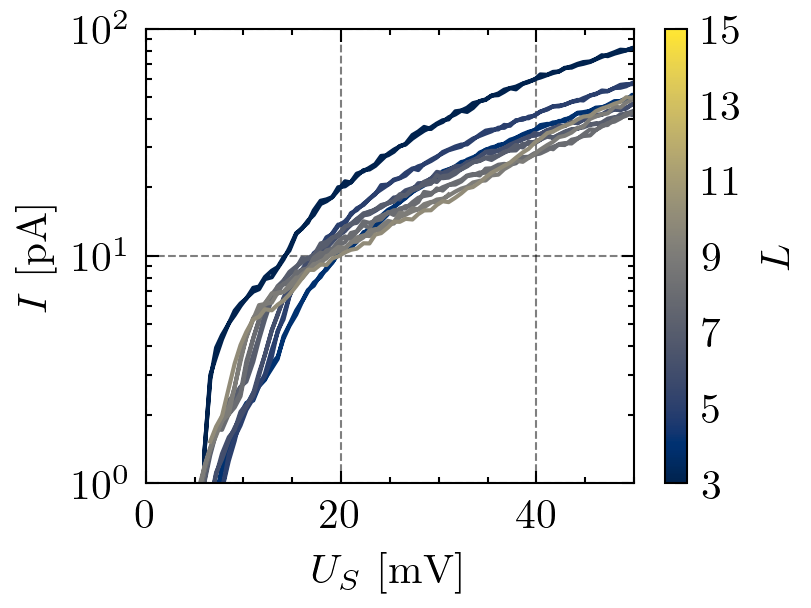

In [ ]:
cmap    = plt.get_cmap('cividis')
norm    = mcolors.Normalize(vmin=min(N_PARTICLES),vmax=max(N_PARTICLES))
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
fig.set_size_inches(w * scale, h * scale)
for i, N in enumerate(N_PARTICLES):
    _ = ax.plot(np.abs(V_INPUT[:len(y[N])]*1000), np.abs(y[N]*1e-6),color=cmap(norm(N)))
_   = ax.set_xlabel("$U_S~[\mathrm{mV}]$")
_   = ax.set_ylabel("$I~[\mathrm{pA}]$")
_   = ax.set_yscale('log')
_   = ax.set_xlim(0,50)
_   = ax.set_ylim(1e0,1e2)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$L$")
cbar.set_ticks(N_PARTICLES[::2])